In [1]:
# Cell 1: Setup Kaggle API (Upload kaggle.json first)
# Upload your kaggle.json file to Colab via the file upload button if not already done.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Cell 2: Download and Extract Dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

import zipfile
zip_ref = zipfile.ZipFile('vegetable-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Optional: List directories to verify structure
!ls /content
# Expected: train, validation, test (or similar; adjust paths if extracted to a subfolder)

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 99% 531M/534M [00:04<00:00, 56.5MB/s]
100% 534M/534M [00:04<00:00, 130MB/s] 
 kaggle.json   sample_data   vegetable-image-dataset.zip  'Vegetable Images'


In [3]:
# Cell 3: Import Libraries and Load VGG16 Base
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

# Load VGG16 base model (pre-trained on ImageNet, exclude top layers)
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# Fine-tuning: Freeze layers up to block5_conv1, then set trainable=True for later layers
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Print trainable status
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [4]:
# Cell 4: Build the Model
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))  # 15 classes for vegetables, softmax for multi-class

In [5]:
# Cell 5: Create Image Datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/train',  # Adjust if extracted to a subfolder, e.g., '/content/Vegetable Image Dataset/train'
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/validation',  # Use dedicated validation folder
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    shuffle=False
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
# Cell 6: Normalization Function and Apply to Datasets
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

# Optimize for performance (optional but recommended)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
# Cell 7: Compile Model
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',  # For multi-class with integer labels
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,815,951 (64.15 MB)

 Trainable params: 9,180,687 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
# Cell 8: Train the Model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - accuracy: 0.6456 - loss: 1.2452 - val_accuracy: 0.9793 - val_loss: 0.0948
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9845 - loss: 0.0691 - val_accuracy: 0.9897 - val_loss: 0.0409
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9969 - loss: 0.0159 - val_accuracy: 0.9883 - val_loss: 0.0367
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.9986 - loss: 0.0060 - val_accuracy: 0.9940 - val_loss: 0.0217
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9933 - val_loss: 0.0219
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9999 - loss: 6.9059e-04 - val_accuracy: 0.9917 - val_loss: 0.0308
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 1.0000 - loss: 4.6366e-04 - val_accuracy: 0.9950 - val_loss: 0.0195
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 1.0000 -

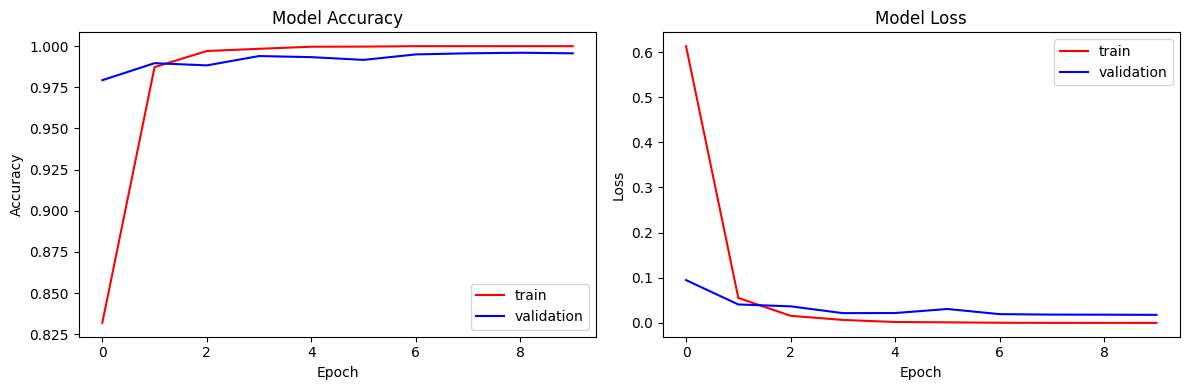

In [9]:
# Cell 9: Plot Training History
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Cell 1: Import Libraries and Load Model + Class Names

from google.colab import files
import numpy as np
from PIL import Image

# Load the trained model
#model = keras.models.load_model('/content/vegetable_classifier_vgg16.h5')

# Load class names (assuming from the train directory; adjust if needed)
import os
class_names = sorted(os.listdir('/content/Vegetable Images/train'))  # Gets the 15 vegetable folder names
print("Class names:", class_names)
print("Number of classes:", len(class_names))

Class names: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
Number of classes: 15


In [14]:
|# Cell 2: Upload and Preprocess Image Function
def preprocess_image(image_path, target_size=(150, 150)):
    """
    Load and preprocess a single image for prediction.
    - Resize to 150x150
    - Normalize to [0,1]
    - Add batch dimension
    """
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dim
    return img_array, img

# Upload an image file
uploaded = files.upload()

# Get the first (and only) uploaded file
image_filename = list(uploaded.keys())[0]
print(f"Uploaded image: {image_filename}")

Saving download.jpg to download.jpg
Uploaded image: download.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


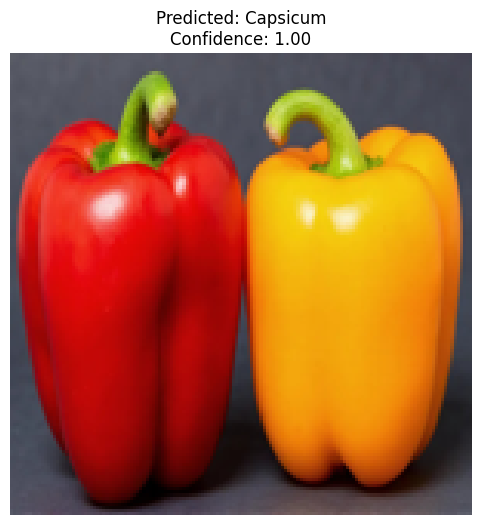

Predicted vegetable: Capsicum (Confidence: 1.00)


In [17]:
# Cell 3: Predict and Display Result
# Preprocess the uploaded image
input_image, original_img = preprocess_image(image_filename)

# Predict
predictions = model.predict(input_image)
predicted_class_idx = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_idx]
confidence = predictions[0][predicted_class_idx]

# Display the image and prediction
plt.figure(figsize=(8, 6))
plt.imshow(original_img)
plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}')
plt.axis('off')
plt.show()

print(f"Predicted vegetable: {predicted_class} (Confidence: {confidence:.2f})")

In [18]:
model.save('/content/vegetable_classifier_vgg16.keras')